# Import libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import data

In [91]:
df = pd.read_csv("house_prices_dataset.csv")

In [92]:
df.head()

,Square_Footage,Bedrooms,Bathrooms,Neighborhood,Year_Built,Garage_Size,Price
0,1650,3,4,Urban,1985,288,545753.79
1,2406,2,2,Suburban,1963,440,547659.15
2,1509,4,1,Rural,1962,515,146686.21
3,2297,3,1,Suburban,2005,49,321223.67
4,1900,3,3,Suburban,2019,519,239701.58


In [93]:
df.dtypes

Square_Footage      int64
 Bedrooms           int64
 Bathrooms          int64
 Neighborhood      object
 Year_Built         int64
 Garage_Size        int64
 Price            float64
dtype: object

In [94]:
df = df.rename(columns=lambda x: x.strip())

In [95]:
X = df.iloc[: , :-1]
X.head()

,Square_Footage,Bedrooms,Bathrooms,Neighborhood,Year_Built,Garage_Size
0,1650,3,4,Urban,1985,288
1,2406,2,2,Suburban,1963,440
2,1509,4,1,Rural,1962,515
3,2297,3,1,Suburban,2005,49
4,1900,3,3,Suburban,2019,519


In [96]:
y = df.iloc[:, -1]
y.head()

0    545753.79
1    547659.15
2    146686.21
3    321223.67
4    239701.58
Name: Price, dtype: float64

# House price distribution

How the prices are distributed in dataset

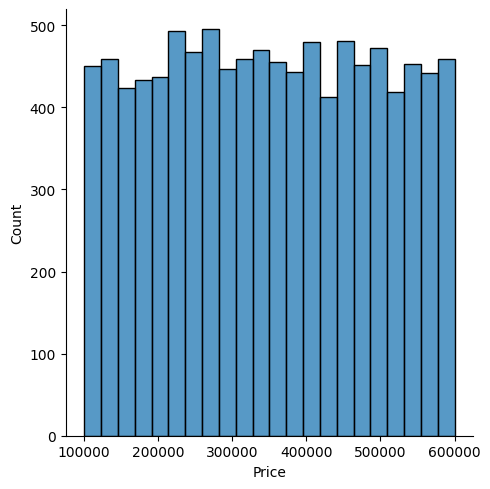

In [124]:
sns.displot(y) 

In [122]:
df['Price'].describe()

count     10000.000000
mean     349760.092615
std      143476.211837
min      100138.630000
25%      227567.017500
50%      348390.480000
75%      472830.535000
max      599974.610000
Name: Price, dtype: float64

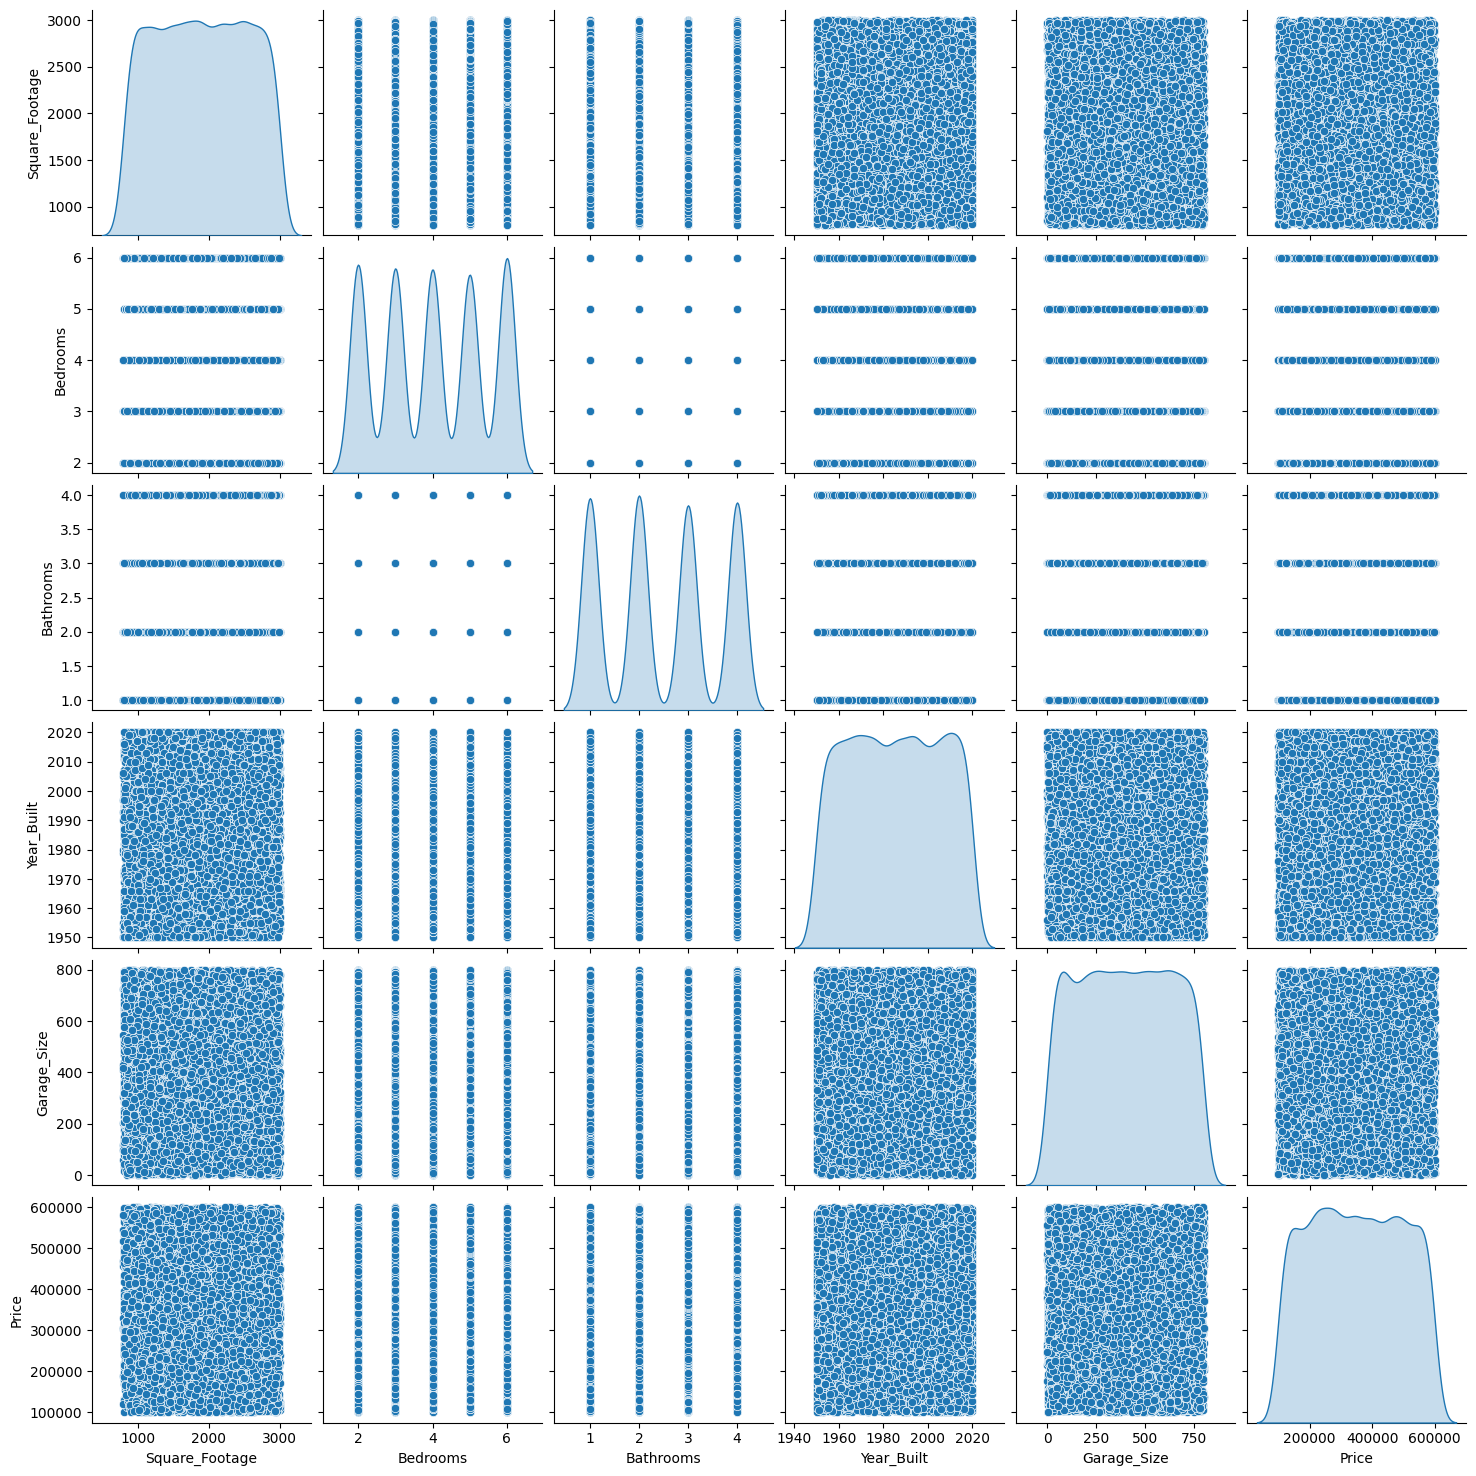

In [146]:
sns.pairplot(df, diag_kind='kde')

<Axes: xlabel='Year_Built', ylabel='count'>

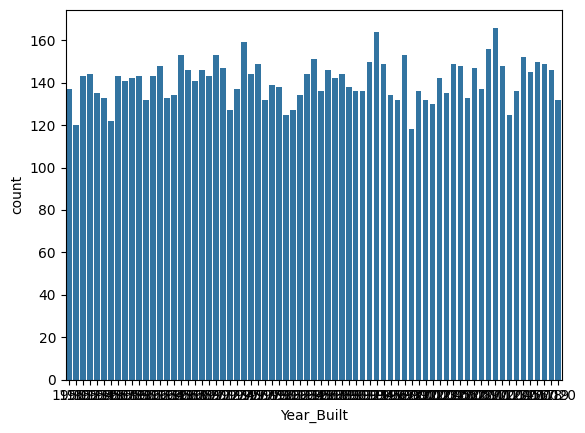

In [132]:
sns.barplot(df["Year_Built"].value_counts())

# Removing outliers

In [180]:
df.iloc[np.where(df.duplicated(subset=['Square_Footage','Bedrooms', 'Bathrooms','Neighborhood','Year_Built',], keep=False) == True)[0],:]
# here in the below record we can see at 9948 row and 7759 row that even the garage size is increasing and the other fields are same then still the price is low in the larger garage size 
# similary at row 9199 and 6669

,Square_Footage,Bedrooms,Bathrooms,Neighborhood,Year_Built,Garage_Size,Price
26,2903,6,1,Suburban,1975,479,530453.95
246,2340,6,2,Suburban,1990,274,563199.79
2680,2269,5,4,Rural,2005,756,189914.73
3777,2340,6,2,Suburban,1990,159,440392.90
6029,2903,6,1,Suburban,1975,364,450733.24
6048,1482,3,3,Urban,1989,484,284740.17
6521,822,2,1,Rural,1995,627,543242.99
6669,1161,6,2,Rural,1988,52,569403.98
7714,822,2,1,Rural,1995,776,162184.63
7759,2175,5,3,Suburban,2020,413,247890.77


<Axes: ylabel='Bedrooms'>

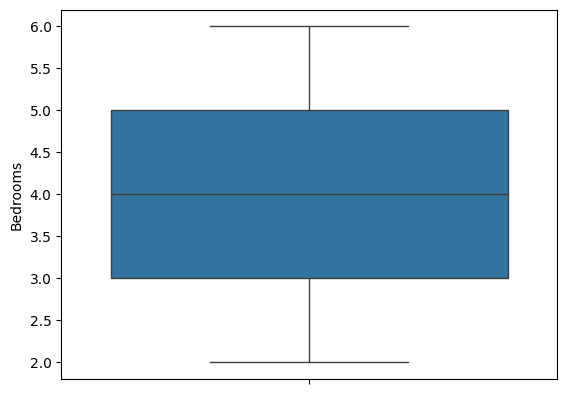

In [185]:
# standard deviation how far the dataset is far from mean value
sns.boxplot(df["Bedrooms"])

In [187]:
df["Square_Footage"].std(),df["Square_Footage"].mean()

(633.3770034085898, 1904.414)

In [194]:
upper_limit = df["Square_Footage"].std()+df["Square_Footage"].mean()
upper_limit

2537.79100340859

In [189]:
lower_limit = -3*df["Square_Footage"].std()+df["Square_Footage"].mean()
lower_limit

4.2829897742306

In [195]:
df[df["Square_Footage"]>upper_limit ]

,Square_Footage,Bedrooms,Bathrooms,Neighborhood,Year_Built,Garage_Size,Price
5,2961,6,2,Rural,2004,177,240016.03
8,2671,6,2,Rural,1950,505,425986.91
12,2741,3,1,Suburban,1991,648,470733.09
16,2552,3,2,Suburban,1983,241,186952.02
19,2902,4,1,Rural,1971,90,371970.89
...,...,...,...,...,...,...,...
9965,2578,5,4,Rural,2018,663,498571.01
9970,2700,2,4,Suburban,2005,417,145835.54
9991,2567,3,2,Rural,1975,281,278341.68
9994,2792,4,3,Rural,1998,663,588541.62


In [201]:
# Z score tells that how much standar deviation  is away from mean
tmp = df
tmp['zscore'] = (df["Square_Footage"] - df["Square_Footage"].mean())/df["Square_Footage"].std()
tmp[tmp['zscore'] > 1.5]

,Square_Footage,Bedrooms,Bathrooms,Neighborhood,Year_Built,Garage_Size,Price,zscore
5,2961,6,2,Rural,2004,177,240016.03,1.668179
19,2902,4,1,Rural,1971,90,371970.89,1.575027
21,2900,2,2,Suburban,2007,65,150951.14,1.571870
26,2903,6,1,Suburban,1975,479,530453.95,1.576606
34,2917,3,1,Urban,2006,543,305542.69,1.598710
...,...,...,...,...,...,...,...,...
9871,2973,5,3,Suburban,1967,49,393849.89,1.687125
9886,2887,4,2,Urban,1996,367,221110.94,1.551345
9889,2909,5,2,Urban,1981,316,541447.18,1.586079
9952,2995,6,2,Urban,1962,654,292172.30,1.721859


In [210]:
# Z score tells that how much standar deviation  is away from mean
tmp = df
tmp['zscore'] = (df["Price"] - df["Price"].mean())/df["Price"].std()
tmp[abs(tmp['zscore']) > 1.5]

,Square_Footage,Bedrooms,Bathrooms,Neighborhood,Year_Built,Garage_Size,Price,zscore
28,2287,2,1,Rural,1990,185,117498.98,-1.618813
31,2103,4,2,Urban,2017,50,126861.16,-1.553560
32,1376,3,1,Suburban,1993,684,133864.30,-1.504750
38,1830,4,1,Urban,1983,578,586864.46,1.652569
43,2676,3,3,Suburban,1959,256,595304.82,1.711397
...,...,...,...,...,...,...,...,...
9962,1882,5,2,Suburban,1964,544,129445.06,-1.535551
9977,1333,6,1,Suburban,1995,536,107765.64,-1.686652
9983,1085,6,4,Urban,1989,13,568925.18,1.527536
9992,1770,5,2,Urban,2004,63,565230.10,1.501782


# Handling missing values

In [98]:
df.isna().sum() # No null values

Square_Footage    0
Bedrooms          0
Bathrooms         0
Neighborhood      0
Year_Built        0
Garage_Size       0
Price             0
dtype: int64

# Encode categorical data

In [99]:
X["Neighborhood"].value_counts()

Neighborhood
Rural       3425
Urban       3336
Suburban    3239
Name: count, dtype: int64

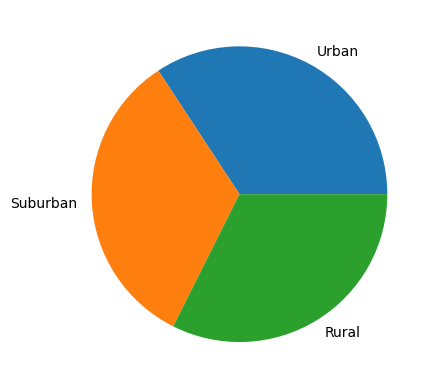

In [100]:
plt.pie(X['Neighborhood'].value_counts(), labels=X['Neighborhood'].unique())
plt.show()

In [101]:
def top_x(df,variable,top_x_labels): # this will basically one hote encode our categorical data with respect to the categorical values
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label,1,0)

In [102]:
top_x(X, 'Neighborhood', X["Neighborhood"].unique())

In [103]:
X.drop("Neighborhood", axis=1, inplace=True)
X.head()

,Square_Footage,Bedrooms,Bathrooms,Year_Built,Garage_Size,Neighborhood_Urban,Neighborhood_Suburban,Neighborhood_Rural
0,1650,3,4,1985,288,1,0,0
1,2406,2,2,1963,440,0,1,0
2,1509,4,1,1962,515,0,0,1
3,2297,3,1,2005,49,0,1,0
4,1900,3,3,2019,519,0,1,0


# Scaling data

# Train test splitting data

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 42) # splitting of the dataset into training dataset and testing dataset

# Feature scaling

In [105]:
from sklearn import preprocessing
sc = preprocessing.StandardScaler(with_mean=False)

In [106]:
sc.fit(x_train)
x_train = sc.transform(x_train)

In [107]:
sc.fit(x_test)
x_test = sc.transform(x_test)

In [108]:
x_train

array([[4.71077212, 4.21824617, 2.69738948, ..., 0.        , 2.13626213,
        0.        ],
       [4.64275224, 1.40608206, 2.69738948, ..., 0.        , 0.        ,
        2.10445869],
       [4.11124806, 2.10912309, 0.89912983, ..., 2.12460571, 0.        ,
        0.        ],
       ...,
       [3.41206698, 1.40608206, 2.69738948, ..., 0.        , 0.        ,
        2.10445869],
       [1.70207884, 2.10912309, 1.79825965, ..., 0.        , 0.        ,
        2.10445869],
       [4.08593834, 2.81216411, 3.59651931, ..., 0.        , 0.        ,
        2.10445869]])

# Multiple linear regression model

In [54]:
def multiple_reg_model(x_train, y_train, x_test, y_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    from sklearn.model_selection import cross_val_score
    lin_reg= LinearRegression() # instatiate the object linear reg model
    mse = cross_val_score(lin_reg, x_train,y_train, scoring="neg_mean_squared_error", cv= 5) # K fold cross validation here k =5
    lin_reg.fit(x_train, y_train)
    y_pred = lin_reg.predict(x_test)
    return r2_score(y_test,y_pred)

In [55]:
multiple_reg_model(x_train,y_train,x_test,y_test)


-0.0013450237936181164

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
lin_reg= LinearRegression() # instatiate the object linear reg model
mse = cross_val_score(lin_reg, x_train,y_train, scoring="neg_mean_squared_error", cv= 10) # K fold cross validation here k =5
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
print(y_pred)
print(y_test)
r2_score(y_test,y_pred)
# 2054,4,2,Suburban,2003,555,363059.27
# 2481,4,3,Suburban,1967,670,518578.33

[338678.95515822 345986.04460126 355919.38855578 ... 343465.28611035
 353233.04139335 350601.39861519]
6252    470675.05
4684    117810.12
1731    337223.11
4742    494279.27
4521    460655.43
          ...    
8014    563900.87
1074    282354.06
3063    226684.65
6487    363059.27
4705    518578.33
Name: Price, Length: 3000, dtype: float64


-0.001930502946111412

In [110]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3) # max degree of plynomial equation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.fit_transform(x_test)
poly_reg= LinearRegression() # instatiate the object linear reg model
mse = cross_val_score(poly_reg, poly_x_train,y_train, scoring="neg_mean_squared_error", cv= 5) # K fold cross validation here k =5
poly_reg.fit(poly_x_train, y_train)
y_pred = poly_reg.predict(poly_x_test)
print(y_pred, y_test)
r2_score(y_test,y_pred)

[-1.83357569e+14  2.38733552e+14 -4.16395633e+13 ...  2.33971831e+14
 -4.35830259e+13 -4.20296285e+13] 6252    470675.05
4684    117810.12
1731    337223.11
4742    494279.27
4521    460655.43
          ...    
8014    563900.87
1074    282354.06
3063    226684.65
6487    363059.27
4705    518578.33
Name: Price, Length: 3000, dtype: float64


-1.5171410700849859e+18

In [67]:
pd.concat([X,y],axis=1).corr()

,Square_Footage,Bedrooms,Bathrooms,Year_Built,Garage_Size,Neighborhood_Urban,Neighborhood_Suburban,Neighborhood_Rural,Price
Square_Footage,1.000000,0.010924,0.030290,-0.007507,-0.002870,-0.010734,0.000027,0.010638,0.003527
Bedrooms,0.010924,1.000000,-0.011824,-0.002250,-0.004112,-0.003918,0.000943,0.002962,0.013435
Bathrooms,0.030290,-0.011824,1.000000,-0.011180,0.009773,-0.004925,0.004439,0.000516,0.002880
Year_Built,-0.007507,-0.002250,-0.011180,1.000000,0.005982,-0.015152,0.001764,0.013315,0.008007
Garage_Size,-0.002870,-0.004112,0.009773,0.005982,1.000000,-0.004719,-0.019532,0.023950,0.021815
Neighborhood_Urban,-0.010734,-0.003918,-0.004925,-0.015152,-0.004719,1.000000,-0.489717,-0.510655,0.004492
Neighborhood_Suburban,0.000027,0.000943,0.004439,0.001764,-0.019532,-0.489717,1.000000,-0.499554,0.004545
Neighborhood_Rural,0.010638,0.002962,0.000516,0.013315,0.023950,-0.510655,-0.499554,1.000000,-0.008945
Price,0.003527,0.013435,0.002880,0.008007,0.021815,0.004492,0.004545,-0.008945,1.000000


In [113]:
from sklearn.ensemble import AdaBoostRegressor
ABR_model = AdaBoostRegressor(n_estimators=10000, random_state=0)
ABR_model.fit(x_train,y_train)
y_pred = ABR_model.predict(x_test)
print(y_pred, y_test)
r2_score(y_test,y_pred)

[344361.81578701 348189.21357117 362120.33228468 ... 347207.66847408
 348409.3270514  349412.88118361] 6252    470675.05
4684    117810.12
1731    337223.11
4742    494279.27
4521    460655.43
          ...    
8014    563900.87
1074    282354.06
3063    226684.65
6487    363059.27
4705    518578.33
Name: Price, Length: 3000, dtype: float64


-0.00026669282743641

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor(random_state = 42)





param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3, 5, 7],
    # 'min_samples_leaf': [3, 4, 5],
    # 'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}



grid_search_cv = GridSearchCV(estimator=model, 
                              param_grid = param_grid, verbose=1, cv=5,scoring='r2',n_jobs=-1 )



grid_search_cv.fit(x_train, y_train)
print("Best Estimator", grid_search_cv.best_estimator_)
print("Best score", grid_search_cv.best_score_) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Estimator RandomForestRegressor(max_depth=80, max_features=5, n_estimators=200,
                      random_state=42)
Best score -0.04134790617547912


# Deep learning models

As there are many hidden trends in the given dataset which could not be predict by simple linear models thats why we need several neurons in it which helps in prediction in better way

In [133]:
x_train.shape

(7000, 8)

In [143]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse

In [149]:
def linear_model(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(Dense(6, activation='relu')) # input layer
    model.add(Dense(10, activation='relu')) #hidden layer
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))#output layer
    model.compile(optimizer = Adam(learning_rate=0.05), loss='mean_absolute_error') # loss function mean squared error
    train = model.fit(x_train, y_train, epochs=100)
    plt.plot(train.history['loss'], label = 'loss')

    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend('Adam')
    pred = model.predict(x_test)
    return r2_score(y_test, pred)

Epoch 1/100
219/219 [==============================] - 2s 2ms/step - loss: 151962.5625
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 125887.6875
Epoch 3/100
219/219 [==============================] - 1s 2ms/step - loss: 126899.9297
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 127100.5547
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 126842.2734
Epoch 6/100
219/219 [==============================] - 1s 2ms/step - loss: 125094.2969
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 126144.2891
Epoch 8/100
219/219 [==============================] - 1s 3ms/step - loss: 125811.8438
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 127005.0859
Epoch 10/100
219/219 [==============================] - 1s 2ms/step - loss: 126294.1719
Epoch 11/100
219/219 [==============================] - 1s 2ms/step - loss: 125755.8984
Epoch 12/100
219/219 [===================

-0.014809122638087313

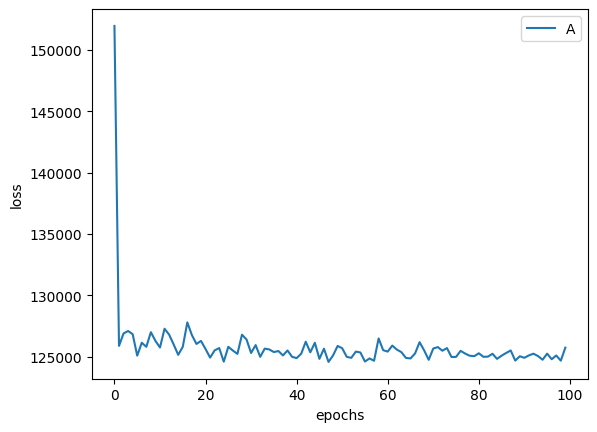

In [150]:
linear_model(x_train,y_train, x_test, y_test)

,Square_Footage,Bedrooms,Bathrooms,Neighborhood,Year_Built,Garage_Size,Price
26,2903,6,1,Suburban,1975,479,530453.95
246,2340,6,2,Suburban,1990,274,563199.79
2680,2269,5,4,Rural,2005,756,189914.73
3777,2340,6,2,Suburban,1990,159,440392.90
6029,2903,6,1,Suburban,1975,364,450733.24
6048,1482,3,3,Urban,1989,484,284740.17
6521,822,2,1,Rural,1995,627,543242.99
6669,1161,6,2,Rural,1988,52,569403.98
7714,822,2,1,Rural,1995,776,162184.63
7759,2175,5,3,Suburban,2020,413,247890.77


In [170]:
df.iloc[2,:]

Square_Footage         1509
Bedrooms                  4
Bathrooms                 1
Neighborhood          Rural
Year_Built             1962
Garage_Size             515
Price             146686.21
Name: 2, dtype: object